In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('./dataset/wdbc.data')
df.columns = ['ID','Diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points',
              'symmetry','fractal_dimension','radius_SE','texture_SE','perimeter_SE','area_SE','smoothness_SE','compactness_SE',
              'concavity_SE','concave_points_SE','symmetry_SE','fractal_dimension_SE','radius_Worst','texture_Worst','perimeter_Worst',
              'area_Worst','smoothness_Worst','compactness_Worst','concavity_Worst','concave_points_Worst','symmetry_Worst',
              'fractal_dimension_Worst']
df.head()

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radius_Worst,texture_Worst,perimeter_Worst,area_Worst,smoothness_Worst,compactness_Worst,concavity_Worst,concave_points_Worst,symmetry_Worst,fractal_dimension_Worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       568 non-null    int64  
 1   Diagnosis                568 non-null    object 
 2   radius                   568 non-null    float64
 3   texture                  568 non-null    float64
 4   perimeter                568 non-null    float64
 5   area                     568 non-null    float64
 6   smoothness               568 non-null    float64
 7   compactness              568 non-null    float64
 8   concavity                568 non-null    float64
 9   concave_points           568 non-null    float64
 10  symmetry                 568 non-null    float64
 11  fractal_dimension        568 non-null    float64
 12  radius_SE                568 non-null    float64
 13  texture_SE               568 non-null    float64
 14  perimeter_SE             5

In [8]:
Y_Lables = df['Diagnosis']
x_Features = df.drop(['ID','Diagnosis'],axis=1)

In [9]:
print(Y_Lables.value_counts())

Diagnosis
B    357
M    211
Name: count, dtype: int64


<Axes: xlabel='Diagnosis', ylabel='Count'>

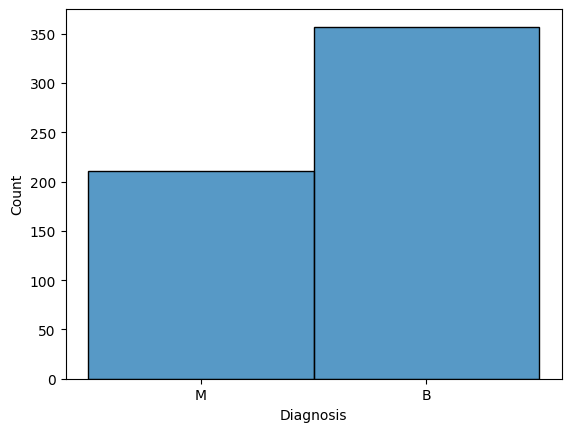

In [10]:
sns.histplot(data=Y_Lables)

In [11]:
x_Features.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,...,radius_Worst,texture_Worst,perimeter_Worst,area_Worst,smoothness_Worst,compactness_Worst,concavity_Worst,concave_points_Worst,symmetry_Worst,fractal_dimension_Worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: >

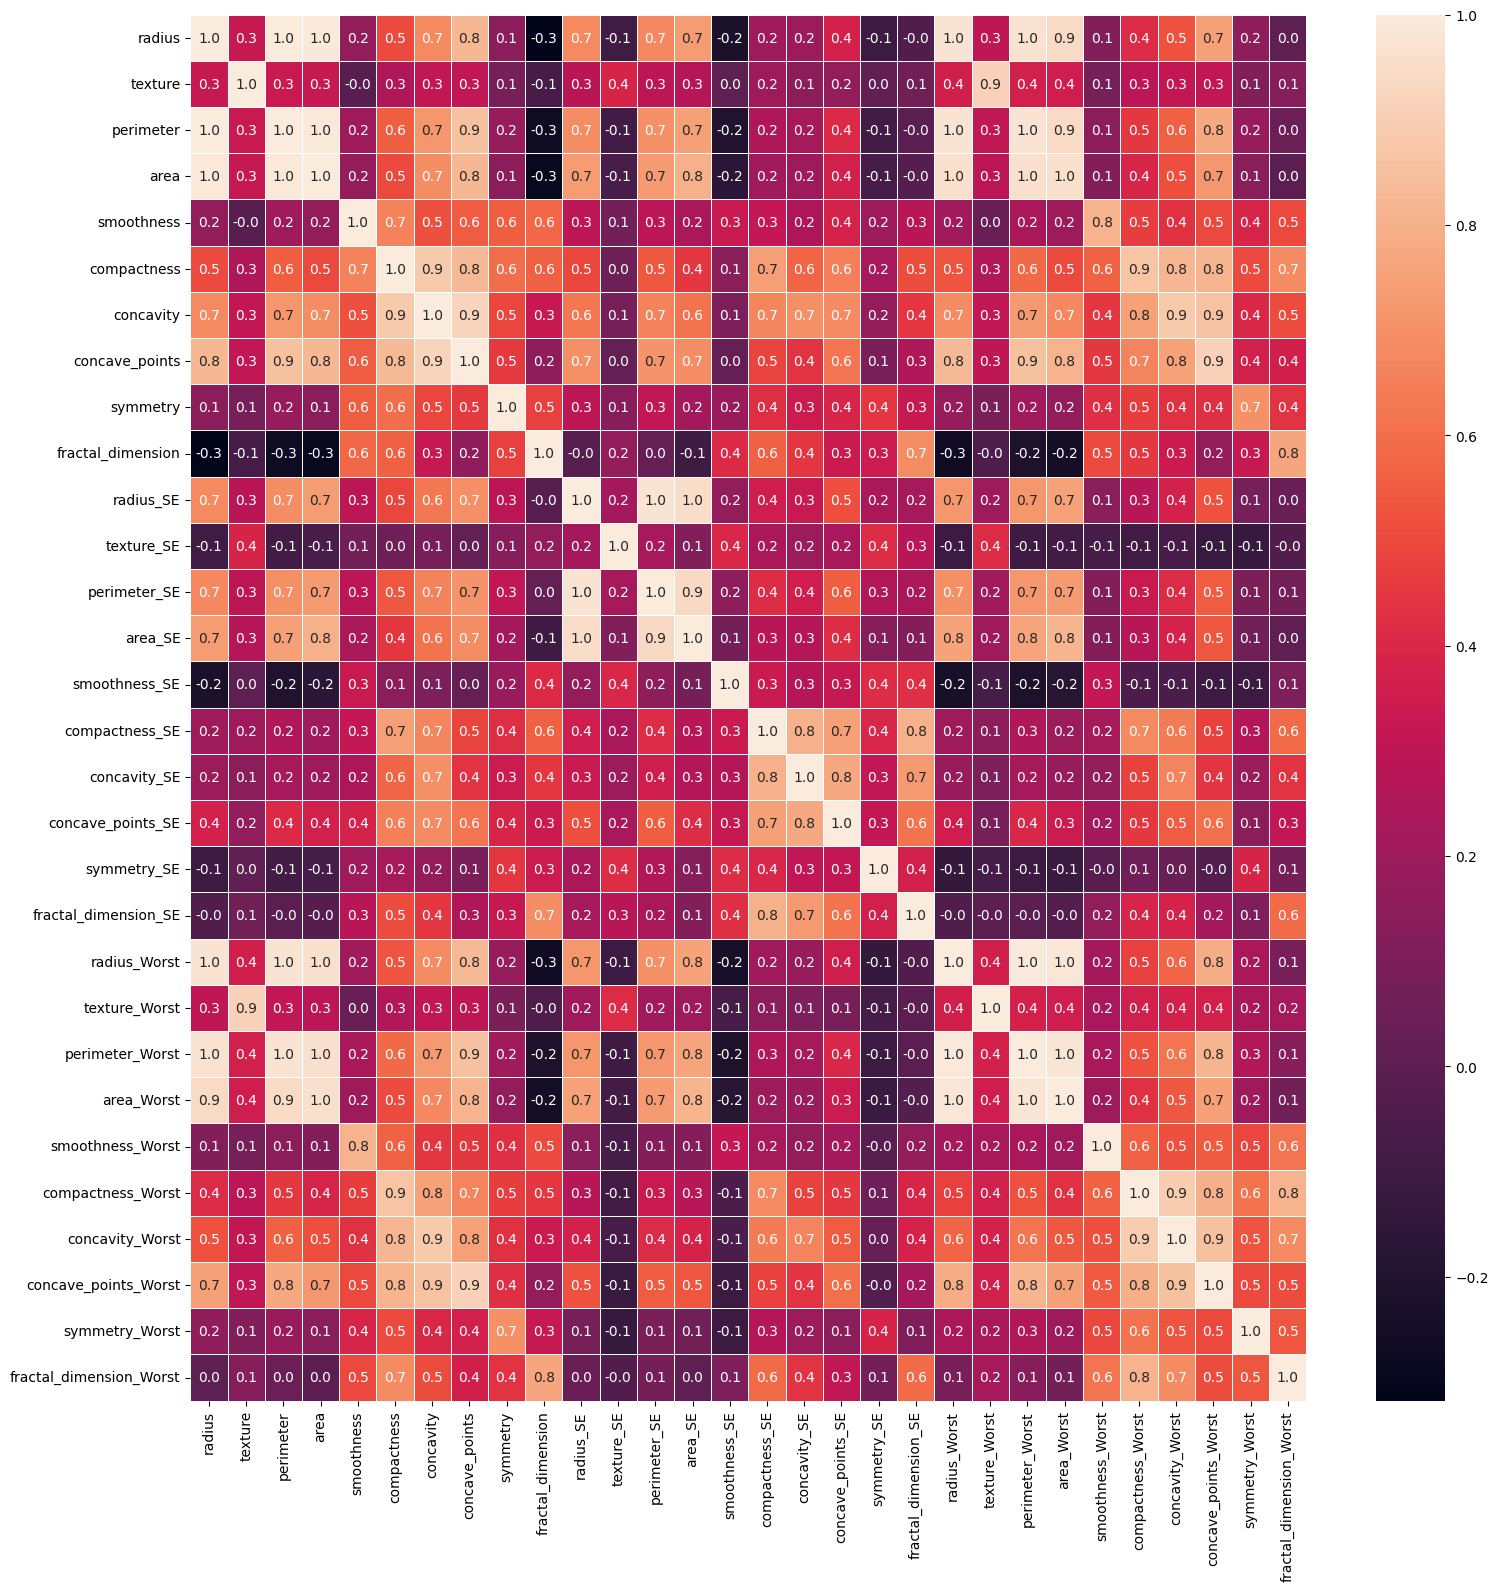

In [12]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x_Features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)